In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 10 11:22:27 2022

@author: Group 12
"""
#import libraries
import folium
import re
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# import chardet 

In [2]:
#IMPORT DATABASE 1
ex_percent_all = 'export_percent_all.csv'
df_ex_percent_all = pd.read_csv(ex_percent_all , sep=',')
ex_percent_eu = 'export_percent_eu.csv'
df_ex_percent_eu = pd.read_csv(ex_percent_eu , sep=',')
im_percent_all = 'import_percent_all.csv'
df_im_percent_all = pd.read_csv(im_percent_all , sep=',')
im_percent_eu = 'import_percent_eu.csv'
df_im_percent_eu = pd.read_csv(im_percent_eu , sep=',')

#IMPORT DATABASE 2
df = pd.read_csv('C:/Users/alain/Desktop/COURS/TIL6022 Programming/PROJECT/ITF_INDICATORS.csv') 
rail_df = pd.read_csv('rail_moved_dos.csv', sep=';')
eugoods_export_df = pd.read_csv('International_trandsports_goods_UK_to_eucountries.csv', sep=';')
eugoods_import_df = pd.read_csv('rail_go_intgong_1_Data.csv')

#create database with only UK
UK_df = df[df.Country == 'United Kingdom']
UK_df.to_csv('UK.csv')

#create database with only KPI of interest 
Goods_vehicles_df = UK_df.loc[UK_df.Indicator == 'First registrations of brand new goods vehicles per one million units of current USD GDP']
CO2_emissions_df = UK_df.loc[UK_df.Indicator == 'Share of CO2 emissions from transport in total CO2 emissions']
Air_transport_df = UK_df.loc[UK_df.Indicator == 'Air freight transport in tonne-km per one thousand units of current USD GDP']
Rail_transport_df = UK_df.loc[UK_df.Indicator =='Rail freight transport in tonne-km per one thousand units of current USD GDP']

#IMPORT DATABASE 3
from_eu_to_countries = pd.read_csv("export_uk_to_eu.csv", encoding='latin-1')
from_countries_to_eu = pd.read_csv("import_coutries_to_eu.csv", encoding='latin-1')

#IMPORT DATABASE 4
file_path = 'UK_SHIPPING.csv'
df = pd.read_csv(file_path, encoding='latin-1')

c:\Users\alain\anaconda3\envs\TIL6022\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#plot 1 1
fig_export_all = px.line(df_ex_percent_all, x='TIME', y='Value', markers=True, color='LOCATION')
fig_export_all.show()

In [4]:
#dataframe: export all countries vs UK in percentage change, previous period 1

df_ex_all_gbr = df_ex_percent_all[(df_ex_percent_all.LOCATION == 'GBR')]
df_ex_all_other = df_ex_percent_all[(df_ex_percent_all.LOCATION != 'GBR')]

gb_ex_all_other = df_ex_all_other.groupby('TIME')
df_ex_all_avg = gb_ex_all_other['Value'].mean()

fig_ex_base_all = px.line(df_ex_all_avg, title='Export of all countries vs UK')
fig_ex_base_all.add_scatter(x=df_ex_all_gbr['TIME'], y=df_ex_all_gbr['Value'], mode='lines', name='UK')

fig_ex_base_all.show()

In [5]:
#dataframe: export EU countries vs UK in percentage change, previous period 1

df_ex_eu_gbr = df_ex_percent_eu[(df_ex_percent_eu.LOCATION == 'GBR')]
df_ex_eu_other = df_ex_percent_eu[(df_ex_percent_eu.LOCATION != 'GBR')]

gb_ex_eu_other = df_ex_eu_other.groupby('TIME')
df_ex_eu_avg = gb_ex_eu_other['Value'].mean()

fig_ex_base_eu = px.line(df_ex_eu_avg, title='Export of EU countries vs UK')
fig_ex_base_eu.add_scatter(x=df_ex_eu_gbr['TIME'], y=df_ex_eu_gbr['Value'], mode='lines', name='UK')

fig_ex_base_eu.show()

In [6]:
#dataframe: import all countries vs UK in percentage change, previous period 1

df_im_all_gbr = df_im_percent_all[(df_im_percent_all.LOCATION == 'GBR')]
df_im_all_other = df_im_percent_all[(df_im_percent_all.LOCATION != 'GBR')]

gb_im_all_other = df_im_all_other.groupby('TIME')
df_im_all_avg = gb_im_all_other['Value'].mean()

fig_im_base_all = px.line(df_im_all_avg, title='Import of all countries vs UK')
fig_im_base_all.add_scatter(x=df_im_all_gbr['TIME'], y=df_im_all_gbr['Value'], mode='lines', name='UK')

fig_im_base_all.show()

In [7]:
#dataframe: import all countries vs UK in percentage change, previous period 1

df_im_eu_gbr = df_im_percent_eu[(df_im_percent_eu.LOCATION == 'GBR')]
df_im_eu_other = df_im_percent_eu[(df_im_percent_eu.LOCATION != 'GBR')]

gb_im_eu_other = df_im_eu_other.groupby('TIME')
df_im_eu_avg = gb_im_eu_other['Value'].mean()

fig_im_base_eu = px.line(df_im_eu_avg, title='Import of EU countries vs UK')
fig_im_base_eu.add_scatter(x=df_im_eu_gbr['TIME'], y=df_im_eu_gbr['Value'], mode='lines', name='UK')

fig_im_base_eu.show()

In [8]:
#plot graph
fig = px.line(Goods_vehicles_df, x="Year", y="Value", labels={"Value" : "Value(1st registration_brand new goods vehicles per 1M units of current USD GDP)"})
fig.show()

In [9]:
fig = px.line(CO2_emissions_df, x="Year", y="Value")
fig.show()

In [10]:
fig = px.line(Air_transport_df, x="Year", y="Value")
fig.show()

In [11]:
fig = px.line(Rail_transport_df, x='Year', y='Value')
fig.show()

In [12]:
fig=px.line(eugoods_export_df, x='Year', y='Value (Thousand tonne)', color='Country', title='International transport of goods from the UK to reporting country')
fig.show()

In [13]:
fig=px.line(eugoods_import_df, x='TIME', y='Value', color='GEO', title='International transport of goods from loading country to the UK')
fig.show()


In [14]:
from_eu_to_uk = from_eu_to_countries.loc[from_eu_to_countries['TIME']=='United Kingdom', ['TIME', '2012', '2013', '2014', '2015', '2016', '2017', '2017', '2019', '2020', '2021']].reset_index()
from_eu_to_uk = from_eu_to_uk.drop(columns = {"index"})
from_uk_to_eu = from_countries_to_eu.loc[from_countries_to_eu['TIME']=='United Kingdom', ['TIME', '2012', '2013', '2014', '2015', '2016', '2017', '2017', '2019', '2020', '2021']].reset_index()
from_uk_to_eu = from_uk_to_eu.drop(columns = {"index"})

In [15]:
X = list(from_eu_to_uk.columns)
Y = list(from_eu_to_uk.iloc[0][:])
Y1 = list(from_uk_to_eu.iloc[0][:])

In [16]:
del X[0]
del Y[0]
del Y1[0]

In [17]:
for k in range(len(X)):
    Y[k]=float(Y[k])
    X[k]=float(X[k])
    Y1[k]=float(Y1[k])

In [18]:
Y1

[188552.5,
 183538.0,
 181920.3,
 184652.0,
 180391.4,
 191528.5,
 191528.5,
 194299.4,
 169045.7,
 147062.3]

In [19]:
data = pd.DataFrame()
data['year'] = X
data['from_eu_to_uk'] = Y
data['from_uk_to_eu'] = Y1

In [20]:
fig = px.line(data, x = 'year', y = ['from_eu_to_uk', 'from_uk_to_eu'], markers=True)
fig.show()

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
list_countries_eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
                     'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                     'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

In [22]:
europe = world.loc[(world['name'].isin(list_countries_eu)),['name', 'iso_a3', 'geometry']].reset_index()

In [23]:
europe = europe.rename(columns = {'name' : 'country'})
europe = europe.drop(columns = {'index'})
europe = europe.set_crs("EPSG:3395", allow_override=True)

<AxesSubplot:>

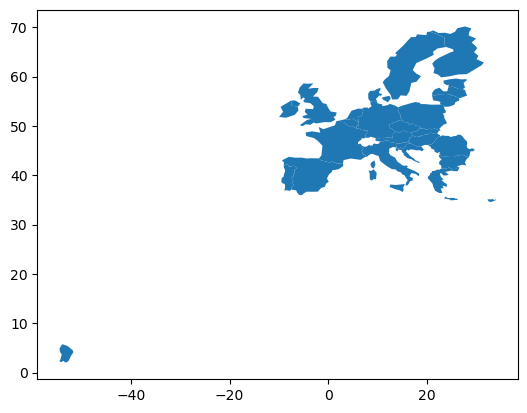

In [24]:
europe.plot()

In [25]:
# m = europe.explore(column='country', legend = False, name='country')
# folium.TileLayer('Stamen Toner', control=True).add_to(m) 
# m

In [26]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.loc[df['Year'] > 2014]

c:\Users\alain\anaconda3\envs\TIL6022\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



In [27]:
#Data Filter
df = df.loc[df['Direction'] == 'Both Directions']
df_region = df.groupby(['Year', 'Region']).sum()
df_region = df_region.reset_index()
df_region = df_region.loc[df_region['Year'] > 2015]

#Plot
fig = px.line(df_region, x='Year', y='Tonnage (thousands)', color='Region', markers='Region')
fig.update_layout(title = 'All Trades by Region')
fig.show()

In [28]:
#Data Filter
df_EU = df.loc[df['Region'] == 'All European Union']
df_EU = df_EU.groupby(['Year']).sum()
df_EU = df_EU.reset_index()
df_EU["Growth Rate"] = df_EU['Tonnage (thousands)'].pct_change()
df_EU = df_EU.loc[df_EU['Year'] > 2015]
df_EU

,Year,CargoCode,Tonnage (thousands),Units (thousands),TEU (thousands),Unnamed: 10,Growth Rate
1,2016,13840,206755.00000,15955.000000,3634.000000,0.0,0.017530
2,2017,14119,207632.00000,15834.000000,3694.000000,0.0,0.004242
3,2018,13967,206159.00000,15524.000000,3570.000000,0.0,-0.007094
4,2019,14191,195335.00000,15500.000000,3394.000000,0.0,-0.052503
5,2020,13503,190117.00000,11038.000000,3671.000000,0.0,-0.026713
6,2021,15017,184977.00205,10536.484046,3890.312047,0.0,-0.027036


In [29]:
#Plot
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_EU['Year'], y=df_EU['Tonnage (thousands)'], name="Tonnage"), secondary_y=True)
fig.add_trace(go.Bar(x=df_EU['Year'], y=df_EU['Growth Rate'], name="Growth Rate"), secondary_y=False)
fig.update_yaxes(range=[180000, 210000], secondary_y=True)
fig.update_yaxes(range=[-0.06, 0.06], secondary_y=False)
fig.update_yaxes(title_text='Tonnage (thousands)', secondary_y=True)
fig.update_yaxes(title_text='Growth', secondary_y=False)
fig.update_layout(title = 'All Trades UK-EU')
fig.show()